In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor 
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score

In [2]:
GDP1=pd.read_excel(r"C:\Users\iT HOME\PycharmProjects\GDP project file\GDP after dummies.xlsx")
GDP1.head()

,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),...,Region_C.W. OF IND. STATES,Region_EASTERN EUROPE,Region_LATIN AMER. & CARIB,Region_NEAR EAST,Region_NORTHERN AFRICA,Region_NORTHERN AMERICA,Region_OCEANIA,Region_SUB-SAHARAN AFRICA,Region_WESTERN EUROPE,Country_id
0,31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,...,0,0,0,0,0,0,0,0,0,0
1,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,...,0,1,0,0,0,0,0,0,0,1
2,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,...,0,0,0,0,1,0,0,0,0,2
3,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,...,0,0,0,0,0,0,1,0,0,3
4,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,...,0,0,0,0,0,0,0,0,1,4


In [3]:
def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    
    return mae, mse, rmse, r2_square

In [4]:
y = GDP1['GDP ($ per capita)']
X = GDP1.drop(['GDP ($ per capita)'], axis=1)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101,shuffle=True)

In [6]:
dect1 = DecisionTreeRegressor (random_state = 5)
dect1.fit(X_train,y_train)

DecisionTreeRegressor(random_state=5)

In [7]:
dect1_pred = dect1.predict(X_test)
dfff = pd.DataFrame(data=y_test)
df9 = pd.DataFrame(data=dect1_pred)
df9.index = dfff.index

dff=pd.concat([dfff,df9],axis=1,ignore_index=False)
dff.columns=['Actual','Predicted']
dff

,Actual,Predicted
65,700.000000,700.0
54,31100.000000,37800.0
185,13300.000000,15700.0
80,20000.000000,6900.0
33,600.000000,700.0
201,7400.000000,3300.0
37,1400.000000,6300.0
218,4800.000000,9000.0
199,1000.000000,1600.0
66,22000.000000,30900.0


In [8]:
print('decisionTree regresssion Performance:')
print('\nall features, No scaling:')
accuracy=dect1.score(X_test,y_test)
train=dect1.score(X_train,y_train) 
results_df = pd.DataFrame(data=[["decison tree perfromance",*evaluate(y_test, dect1_pred) ,train,accuracy]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Train_Accuracy","Test_Accuracy"])
result_df=results_df
results_df

decisionTree regresssion Performance:

all features, No scaling:


,Model,MAE,MSE,RMSE,R2 Square,Train_Accuracy,Test_Accuracy
0,decison tree perfromance,3680.213544,3.037896e+07,5511.710952,0.627868,1.0,0.627868


In [9]:
fi=np.array(dect1.feature_importances_)
print(fi)

[1.80766238e-02 5.89746151e-03 6.98466545e-03 1.63002879e-04
 3.74992390e-03 9.04263674e-02 3.75985758e-02 6.96563911e-01
 8.41807943e-04 8.07034772e-03 3.83082164e-04 1.01530672e-04
 2.44639473e-02 8.34401038e-03 9.00251047e-02 4.73537968e-03
 1.68863722e-03 0.00000000e+00 0.00000000e+00 0.00000000e+00
 4.21945650e-06 2.80857573e-04 0.00000000e+00 2.62670585e-04
 0.00000000e+00 0.00000000e+00 2.63716031e-07 4.21945650e-06
 1.33338969e-03]


<AxesSubplot:>

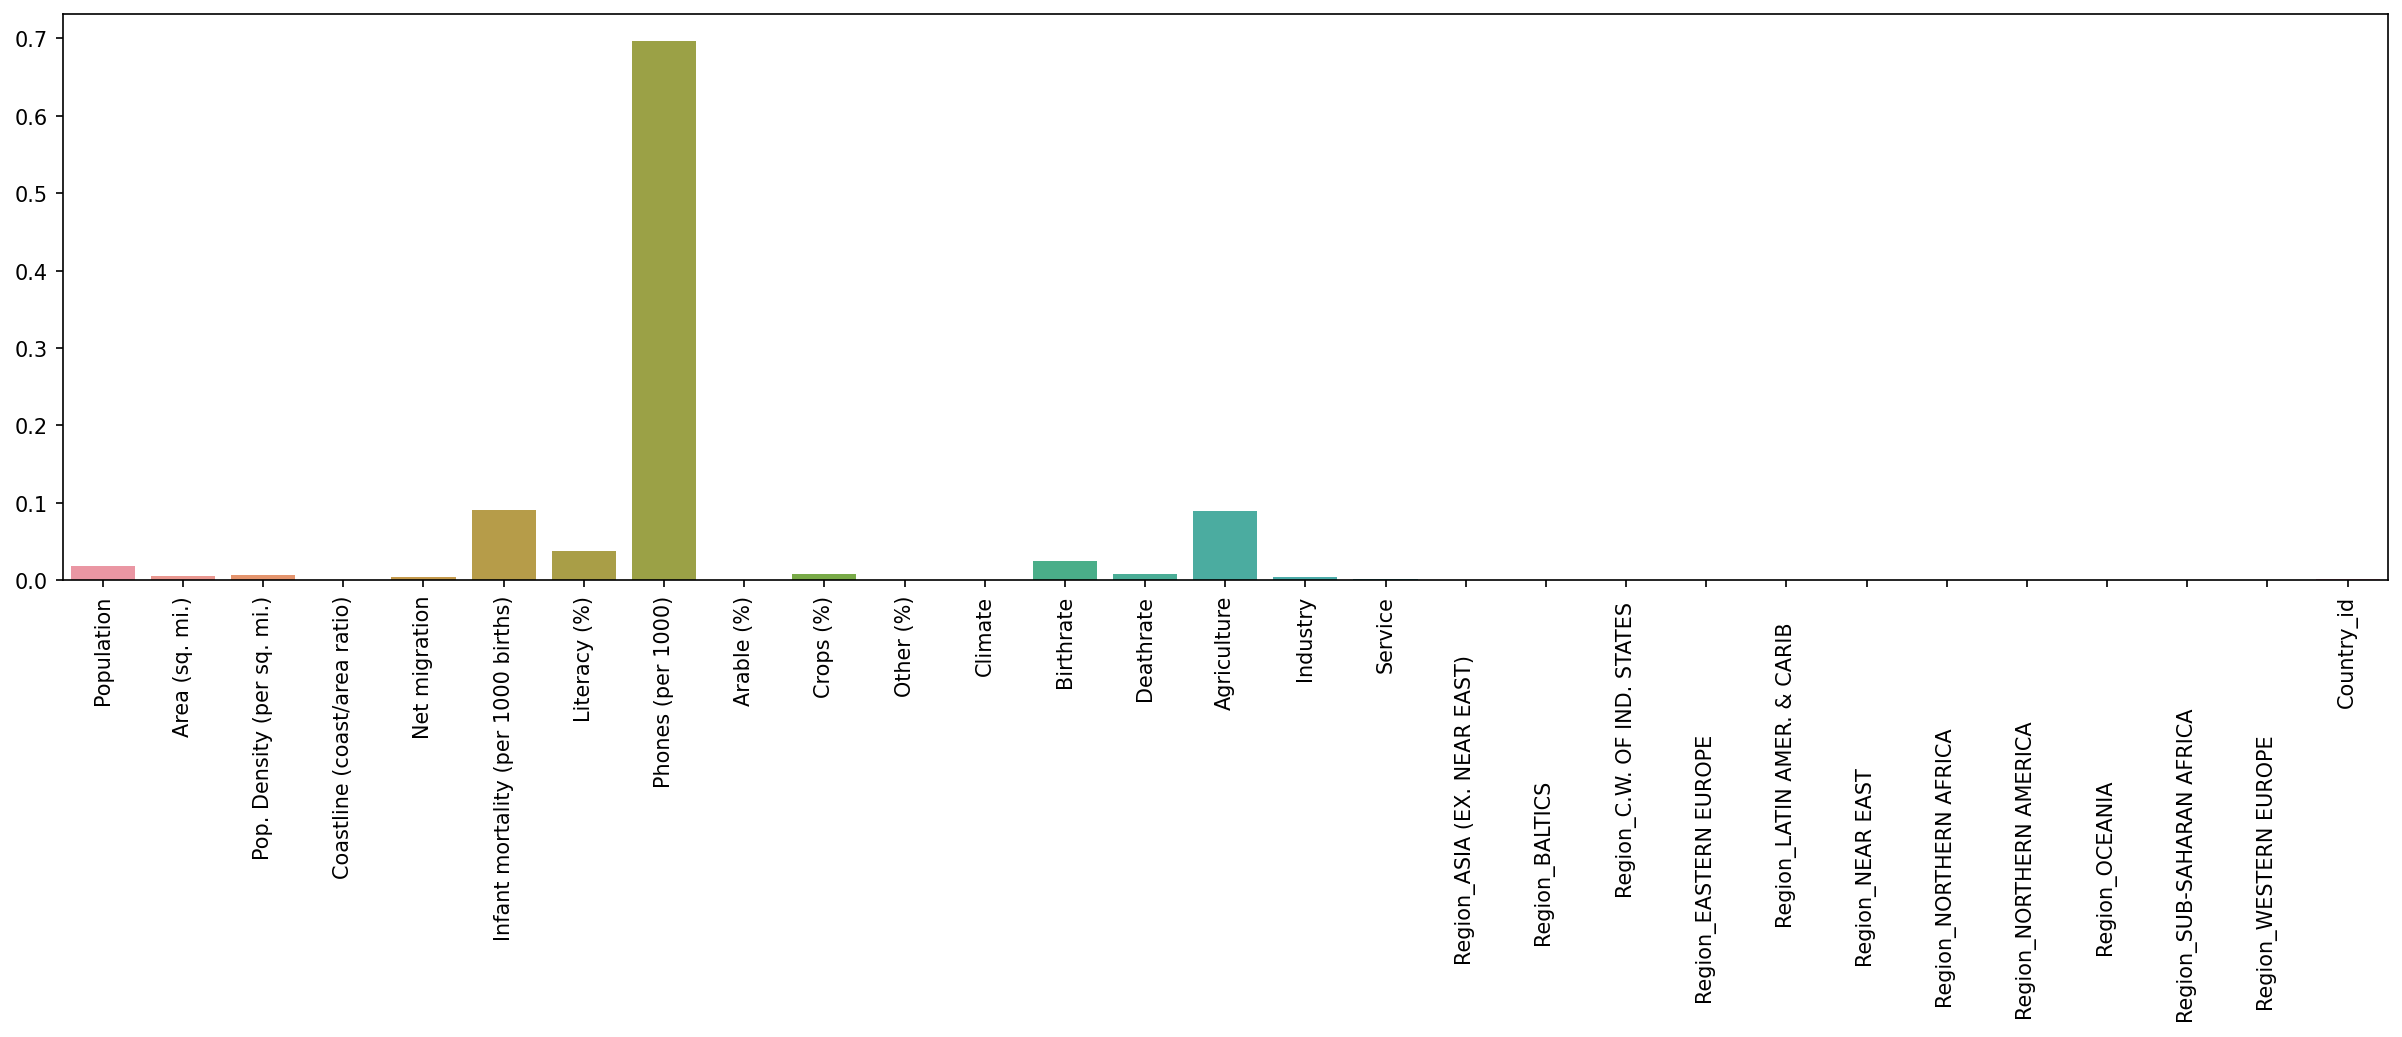

In [10]:
plt.figure(figsize=(20,5),dpi=150)
plt.xticks(rotation=90)
sns.barplot(x=X.columns,y=fi)

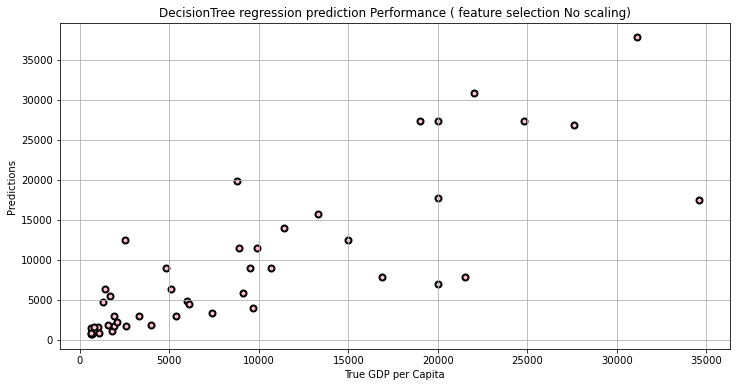

In [11]:
fig = plt.figure(figsize=(12, 6))
plt.scatter(y_test,dect1_pred,color='pink', linewidths=2, edgecolors='black')
plt.xlabel('True GDP per Capita') 
plt.ylabel('Predictions') 
plt.title('DecisionTree regression prediction Performance ( feature selection No scaling)') 
plt.grid()
plt.show()

In [12]:
sc_X = StandardScaler()
X2_train = sc_X.fit_transform(X_train)
X2_test = sc_X.fit_transform(X_test)
y2_train = y_train
y2_test = y_test

In [13]:
dect2 = DecisionTreeRegressor (random_state = 5)
dect2.fit(X2_train,y2_train)

DecisionTreeRegressor(random_state=5)

In [14]:
dect2_pred = dect2.predict(X2_test)
dfff = pd.DataFrame(data=y_test)
df9 = pd.DataFrame(data=dect2_pred)
df9.index = dfff.index

dff=pd.concat([dfff,df9],axis=1,ignore_index=False)
dff.columns=['Actual','Predicted']
dff

,Actual,Predicted
65,700.000000,900.0
54,31100.000000,23700.0
185,13300.000000,18600.0
80,20000.000000,6900.0
33,600.000000,1100.0
201,7400.000000,3700.0
37,1400.000000,7600.0
218,4800.000000,9000.0
199,1000.000000,1600.0
66,22000.000000,17700.0


In [15]:
print('decisionTree regresssion Performance:')
print('\nall features, with scaling:')
accuracy=dect2.score(X2_test,y2_test)
train=dect2.score(X2_train,y2_train) 
results_df = pd.DataFrame(data=[["decison tree perfromance",*evaluate(y2_test, dect2_pred) ,train,accuracy]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Train_Accuracy","Test_Accuracy"])
result_df=results_df
results_df

decisionTree regresssion Performance:

all features, with scaling:


,Model,MAE,MSE,RMSE,R2 Square,Train_Accuracy,Test_Accuracy
0,decison tree perfromance,3780.213544,3.548591e+07,5957.005468,0.56531,1.0,0.56531


In [16]:
fi=np.array(dect2.feature_importances_)
print(fi)

[1.80766238e-02 5.89746151e-03 6.98466545e-03 1.63002879e-04
 3.74992390e-03 9.04263674e-02 3.75985758e-02 6.96563911e-01
 8.41807943e-04 8.07034772e-03 3.83082164e-04 1.01530672e-04
 2.44639473e-02 8.34401038e-03 9.00251047e-02 4.73537968e-03
 1.68863722e-03 0.00000000e+00 0.00000000e+00 0.00000000e+00
 4.21945650e-06 2.80857573e-04 0.00000000e+00 2.62670585e-04
 0.00000000e+00 0.00000000e+00 2.63716031e-07 4.21945650e-06
 1.33338969e-03]


<AxesSubplot:>

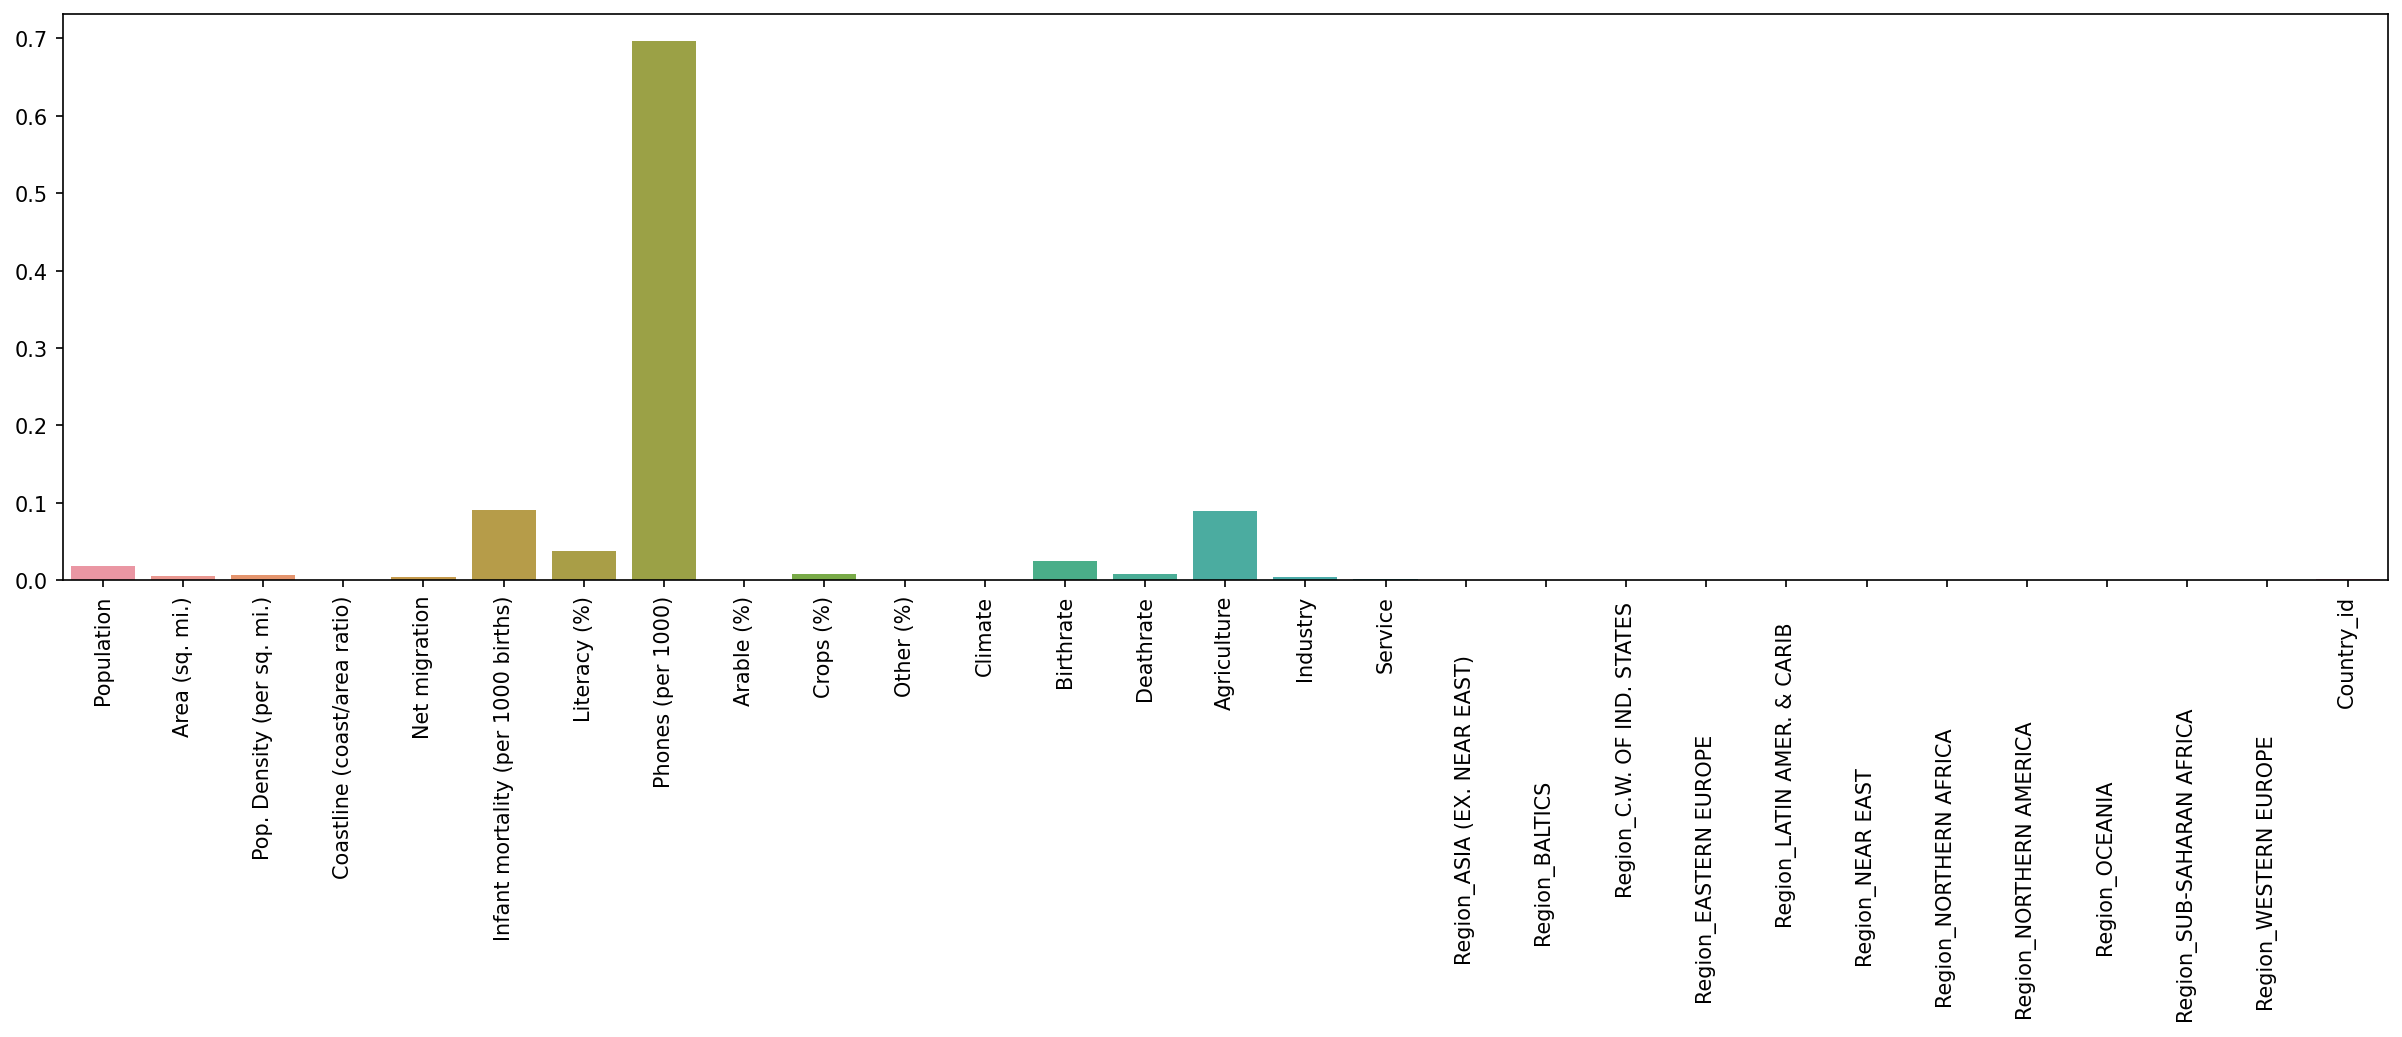

In [17]:
plt.figure(figsize=(20,5),dpi=150)
plt.xticks(rotation=90)
sns.barplot(x=X.columns,y=fi)

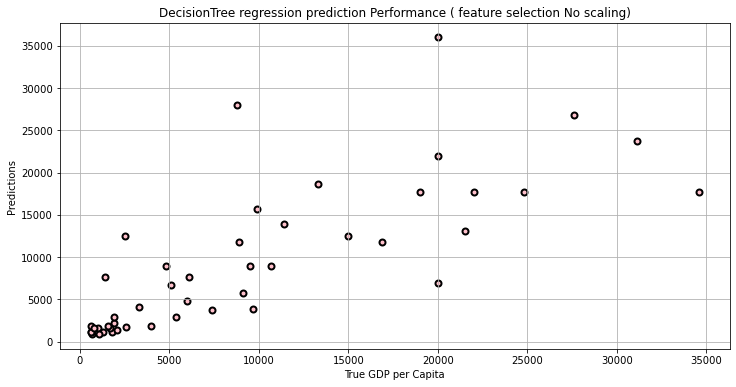

In [18]:
fig = plt.figure(figsize=(12, 6))
plt.scatter(y2_test,dect2_pred,color='pink', linewidths=2, edgecolors='black')
plt.xlabel('True GDP per Capita') 
plt.ylabel('Predictions') 
plt.title('DecisionTree regression prediction Performance ( feature selection No scaling)') 
plt.grid()
plt.show()

In [19]:
y3 = y
X3 = GDP1.drop(["Pop. Density (per sq. mi.)",'GDP ($ per capita)', 'Arable (%)',
                        'Climate', 'Deathrate',"Industry","Service" ], axis=1)
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state=101,shuffle=True)

In [20]:
dect3 = DecisionTreeRegressor (random_state = 5)
dect3.fit(X3_train,y3_train)

DecisionTreeRegressor(random_state=5)

In [21]:
dect3_pred = dect3.predict(X3_test)
dfff = pd.DataFrame(data=y_test)
df9 = pd.DataFrame(data=dect3_pred)
df9.index = dfff.index

dff=pd.concat([dfff,df9],axis=1,ignore_index=False)
dff.columns=['Actual','Predicted']
dff

,Actual,Predicted
65,700.000000,700.0
54,31100.000000,37800.0
185,13300.000000,18600.0
80,20000.000000,6900.0
33,600.000000,1400.0
201,7400.000000,3300.0
37,1400.000000,6300.0
218,4800.000000,9000.0
199,1000.000000,1700.0
66,22000.000000,30900.0


In [22]:
print('decisionTree regresssion Performance:')
print('\nall features, No scaling:')
accuracy=dect3.score(X3_test,y3_test)
train=dect3.score(X3_train,y3_train) 
results_df = pd.DataFrame(data=[["decision tree perfromance",*evaluate(y_test, dect3_pred) ,train,accuracy]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Train_Accuracy","Test_Accuracy"])
result_df=results_df
results_df

decisionTree regresssion Performance:

all features, No scaling:


,Model,MAE,MSE,RMSE,R2 Square,Train_Accuracy,Test_Accuracy
0,decision tree perfromance,3512.822239,2.574039e+07,5073.498878,0.684689,1.0,0.684689


In [23]:
fi=np.array(dect3.feature_importances_)
print(fi)


[1.26211196e-02 6.78925243e-03 9.68454557e-03 8.89902963e-03
 8.83685631e-02 3.78473493e-02 6.96547991e-01 1.03844647e-02
 5.22775277e-03 2.74906282e-02 9.11585170e-02 0.00000000e+00
 0.00000000e+00 6.59290078e-06 0.00000000e+00 1.40648550e-06
 8.79053437e-06 5.16346570e-04 6.89177894e-05 0.00000000e+00
 3.63928123e-05 1.06365466e-05 4.33170283e-03]


<AxesSubplot:>

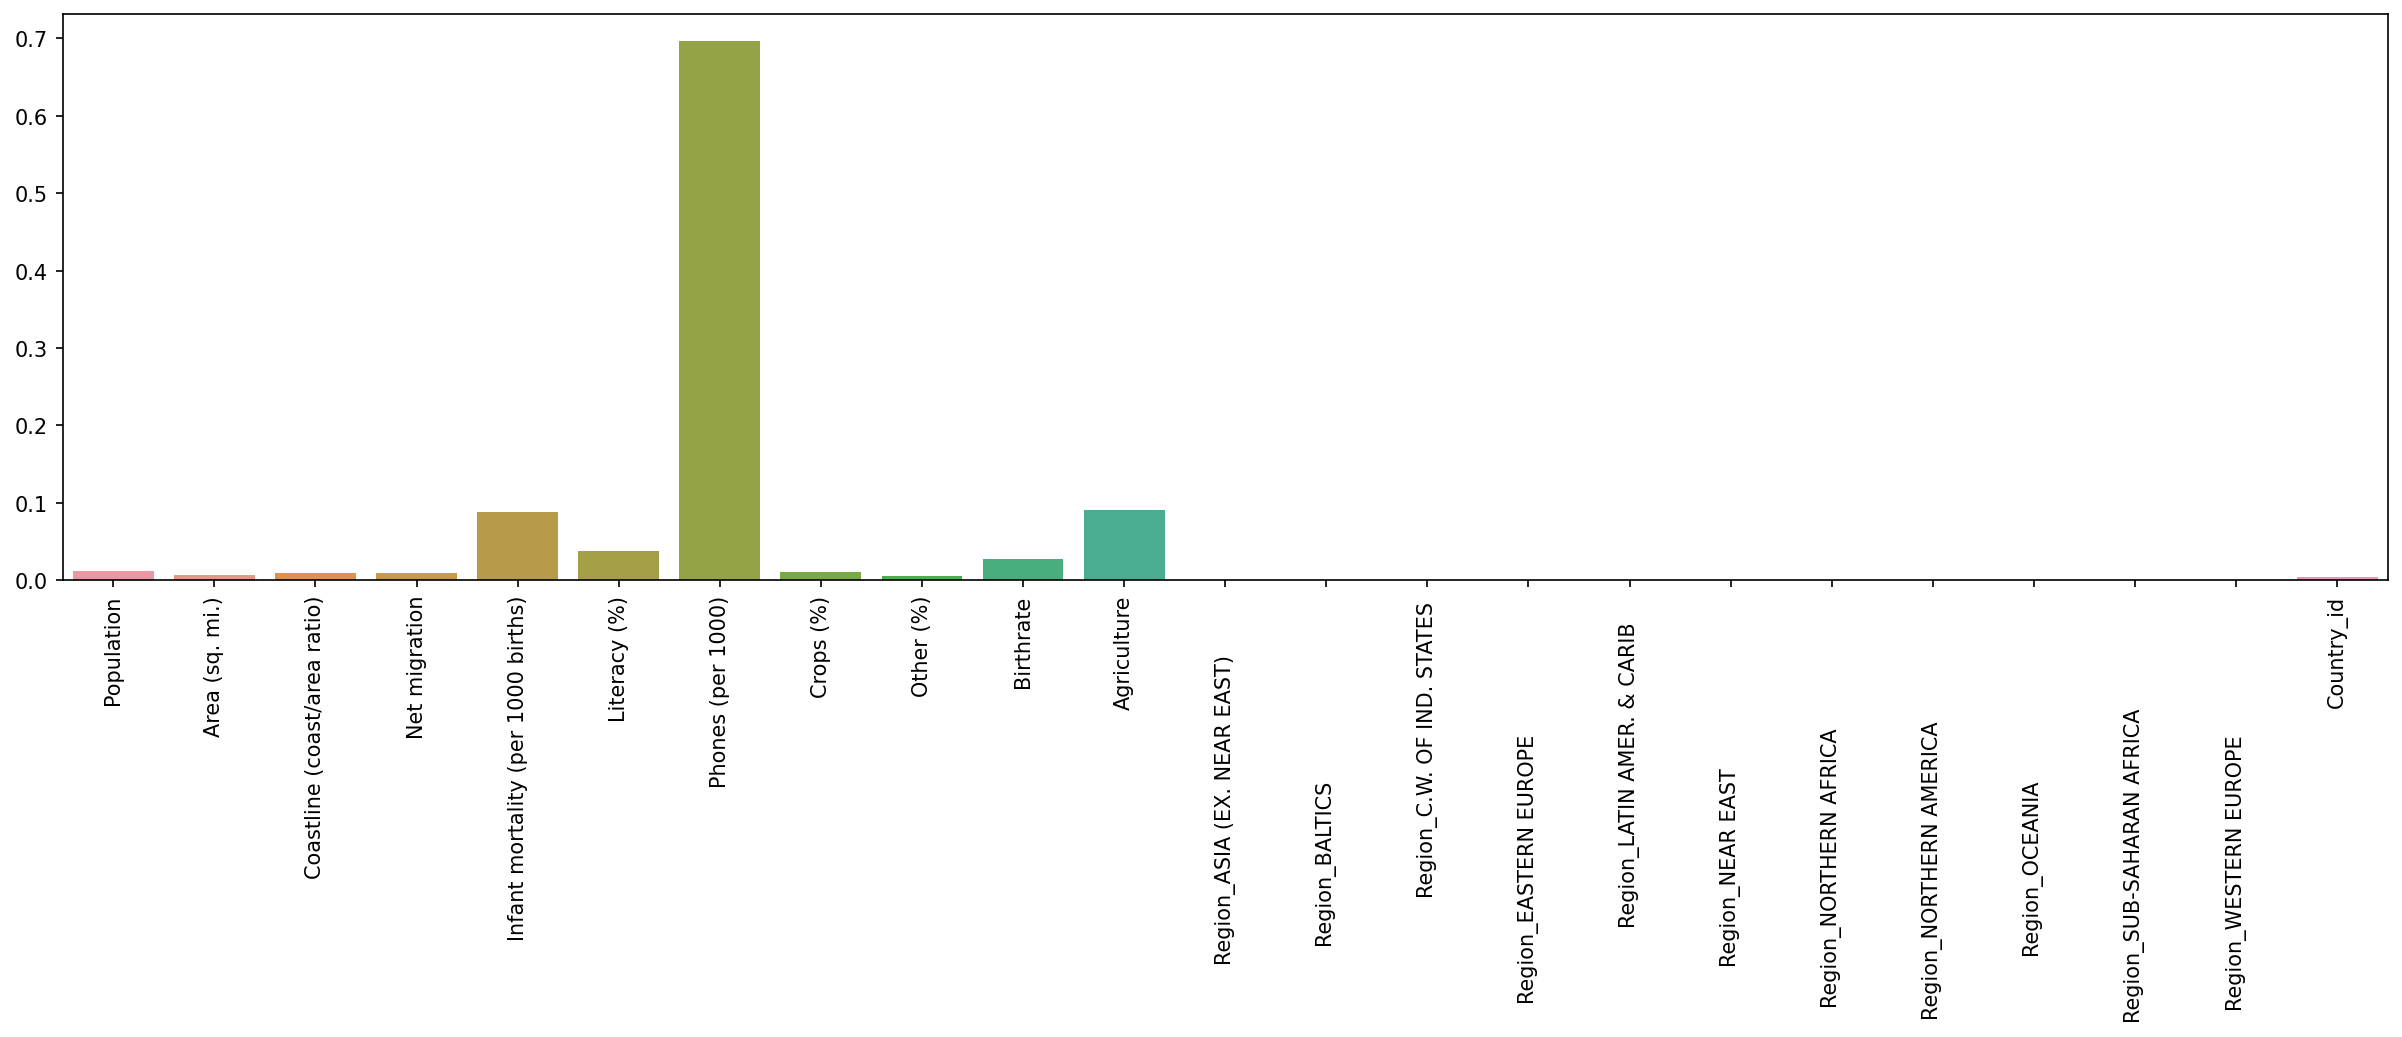

In [24]:
plt.figure(figsize=(20,5),dpi=150)
plt.xticks(rotation=90)
sns.barplot(x=X3.columns,y=fi)

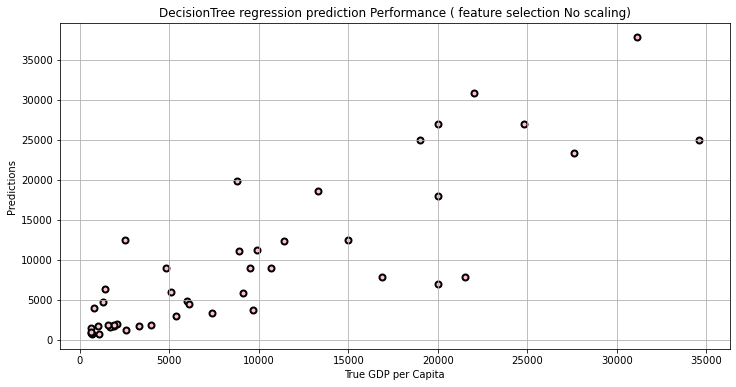

In [25]:
fig = plt.figure(figsize=(12, 6))
plt.scatter(y3_test,dect3_pred,color='pink', linewidths=2, edgecolors='black')
plt.xlabel('True GDP per Capita') 
plt.ylabel('Predictions') 
plt.title('DecisionTree regression prediction Performance ( feature selection No scaling)') 
plt.grid()
plt.show()

In [26]:
sc_X4 = StandardScaler()
X4_train = sc_X4.fit_transform(X3_train)
X4_test = sc_X4.fit_transform(X3_test)
y4_train = y3_train
y4_test = y3_test

In [27]:
dect4 = DecisionTreeRegressor (random_state = 5)
dect4.fit(X4_train,y4_train)

DecisionTreeRegressor(random_state=5)

In [28]:
dect4_pred = dect4.predict(X4_test)
dfff = pd.DataFrame(data=y_test)
df9 = pd.DataFrame(data=dect4_pred)
df9.index = dfff.index

dff=pd.concat([dfff,df9],axis=1,ignore_index=False)
dff.columns=['Actual','Predicted']
dff

,Actual,Predicted
65,700.000000,800.0
54,31100.000000,21000.0
185,13300.000000,18600.0
80,20000.000000,6900.0
33,600.000000,1100.0
201,7400.000000,3700.0
37,1400.000000,7200.0
218,4800.000000,9000.0
199,1000.000000,1600.0
66,22000.000000,17700.0


In [29]:
print('decisionTree regresssion Performance:')
print('\nall features, with scaling:')
accuracy=dect4.score(X4_test,y4_test)
train=dect4.score(X4_train,y4_train) 
results_df = pd.DataFrame(data=[["decision tree perfromance",*evaluate(y_test,dect4_pred) ,train,accuracy]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Train_Accuracy","Test_Accuracy"])
result_df=results_df
results_df

decisionTree regresssion Performance:

all features, with scaling:


,Model,MAE,MSE,RMSE,R2 Square,Train_Accuracy,Test_Accuracy
0,decision tree perfromance,3854.126587,3.285800e+07,5732.18977,0.597501,1.0,0.597501


In [30]:
fi=np.array(dect4.feature_importances_)
print(fi)

[1.26211196e-02 6.78925243e-03 9.68454557e-03 8.89902963e-03
 8.83685631e-02 3.78473493e-02 6.96547991e-01 1.03844647e-02
 5.22775277e-03 2.74906282e-02 9.11585170e-02 0.00000000e+00
 0.00000000e+00 6.59290078e-06 0.00000000e+00 1.40648550e-06
 8.79053437e-06 5.16346570e-04 6.89177894e-05 0.00000000e+00
 3.63928123e-05 1.06365466e-05 4.33170283e-03]


<AxesSubplot:>

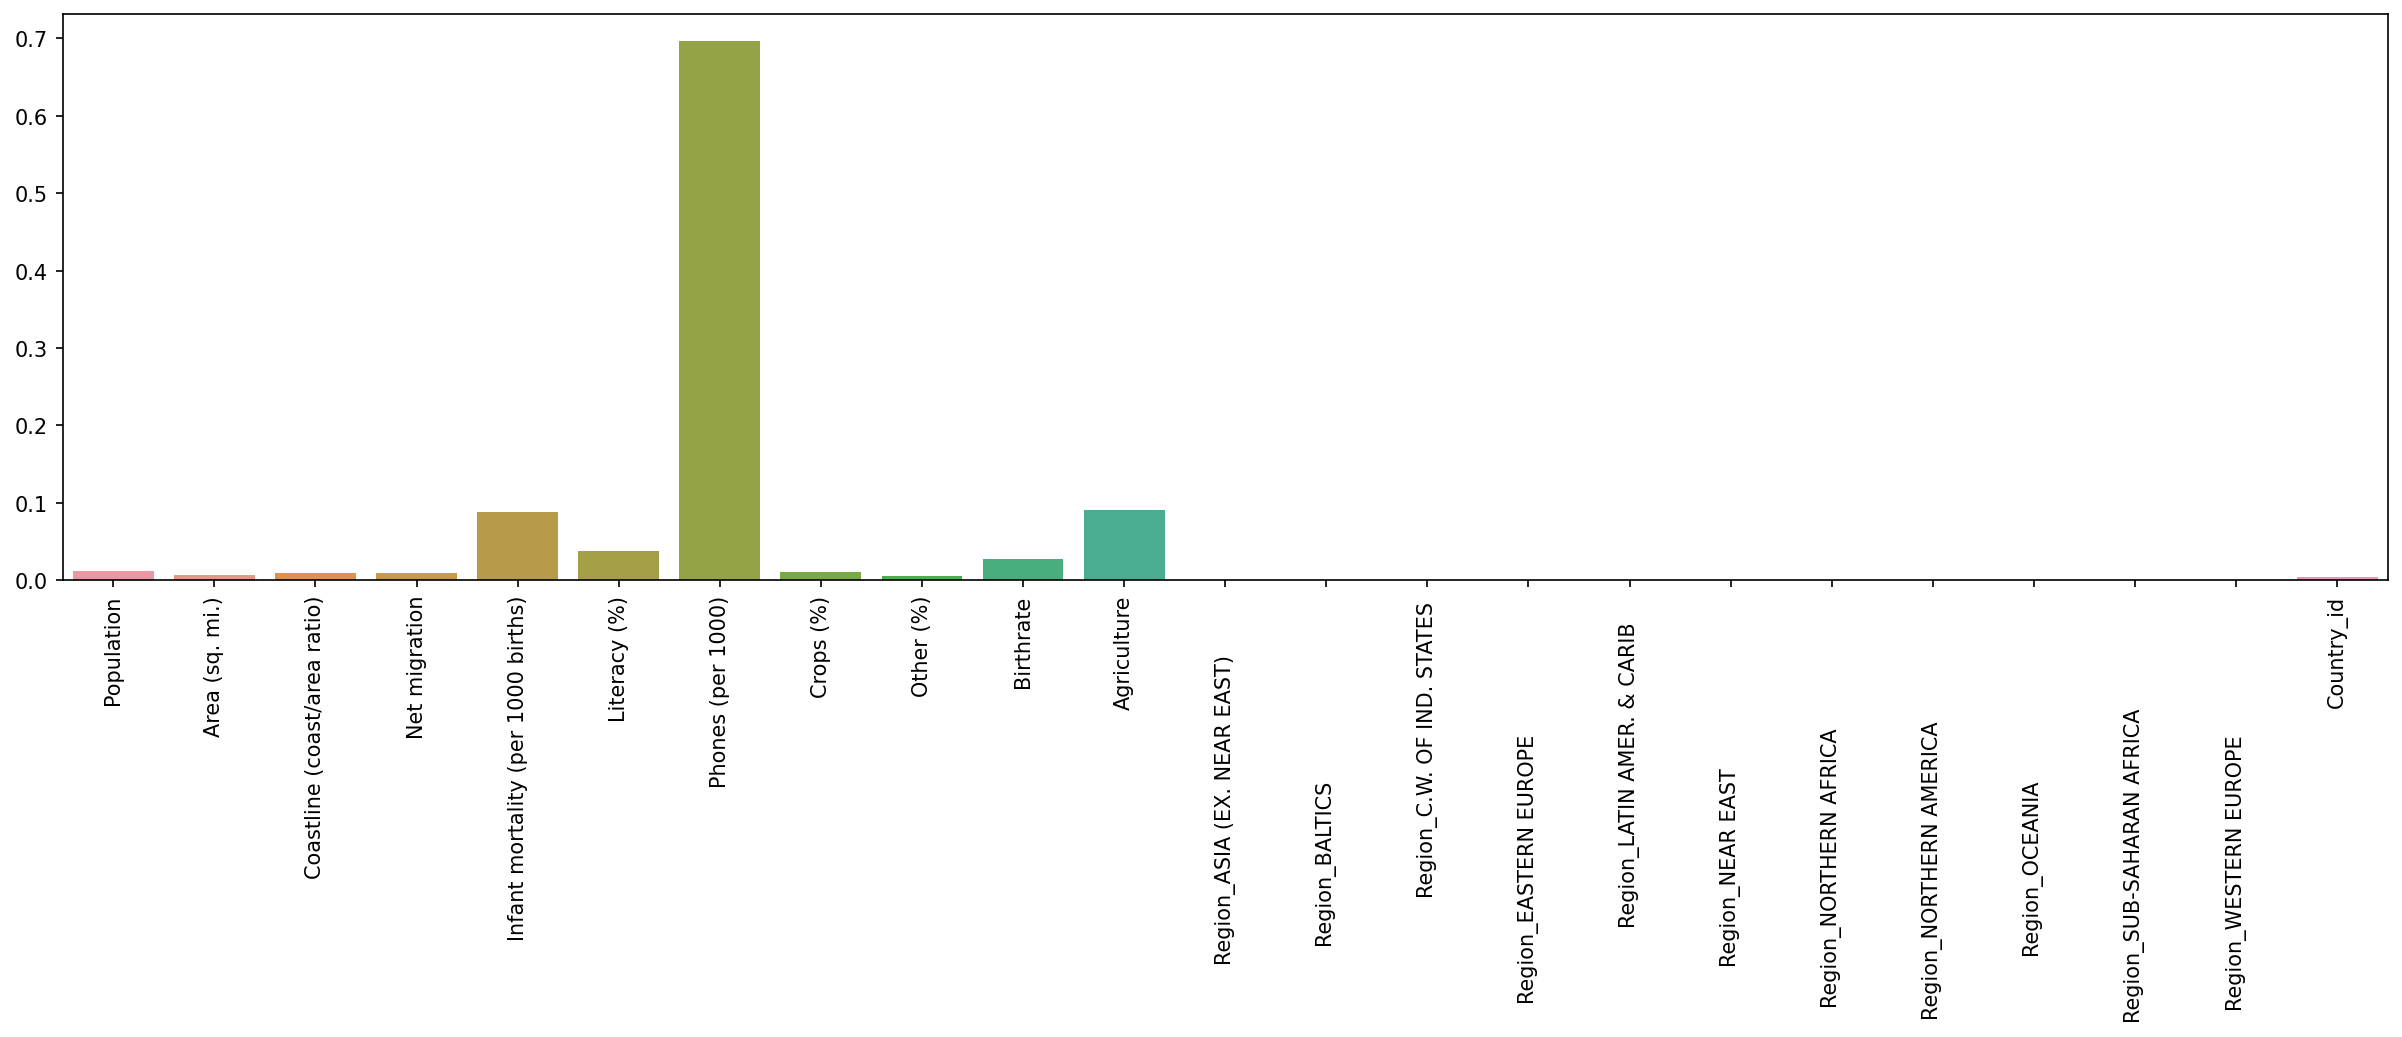

In [31]:
plt.figure(figsize=(20,5),dpi=150)
plt.xticks(rotation=90)
sns.barplot(x=X3.columns,y=fi)

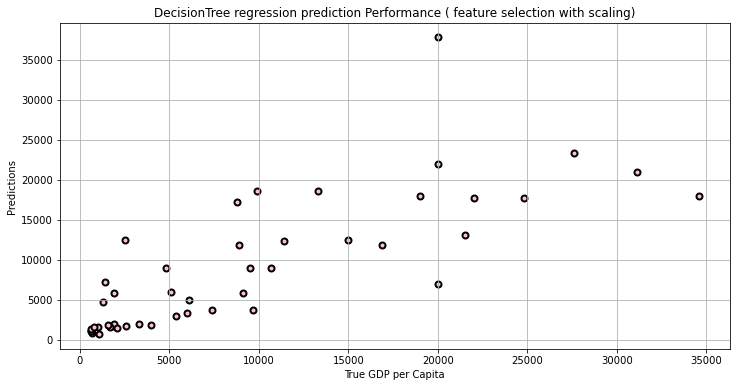

In [32]:
fig = plt.figure(figsize=(12, 6))
plt.scatter(y4_test,dect4_pred,color='pink', linewidths=2, edgecolors='black')
plt.xlabel('True GDP per Capita') 
plt.ylabel('Predictions') 
plt.title('DecisionTree regression prediction Performance ( feature selection with scaling)') 
plt.grid()
plt.show()